Sentiment Analysis 
==================
presented by: [Diane López] (https://github.com/dianita956) 
April 2, 2025
CEDISH - University of Texas at San Antonio Libraries

### Sentiment Analysis for Academic Research
Sentiment analysis is also widely used in academic research to analyze large volumes of text data, 
such as student feedback, academic publications, and social media interactions related to educational topics. 
It helps in understanding trends, opinions, and the overall sentiment in the academic community.

### Workshop Agenda
1. Welcome & Check-In 
2. Setting up your environment
3. Hands-On Practice
4. Q&A 
5. Wrap-up
    - resources list
    - feedback

### Introduction to Sentiment Analysis

#### Techniques

- **Lexicon-based: Uses predefined word lists associated with sentiments.**

- Machine Learning: Models trained on labeled data (e.g., Naive Bayes, SVM).

- Deep Learning: Uses advanced neural networks like RNNs and CNNs for complex sentiment patterns.

- Hybrid: Combines lexicon-based and ML approaches for better accuracy.

## Sentiment Analysis in Python

Sentiment Analysis in Python uses NLP techniques to identify the emotional tone in text.

It classifies sentiment as positive, negative, or neutral, aiding applications like social media monitoring and customer feedback analysis. 

Python provides various powerful libraries for this purpose.


### Creating your own sentiment dictionary and analyzer

While there are many great sentiment dictionaries available, they may not always be the right fit. In such cases, building your own can be a great option!

| Situation | Prebuilt dictionary | Create Custom Directionary |
| :-------- | :-----------------: | :------------------------: |
| General sentiment analysis |  ✅  |                         ❌ |
| Domain Specific text | ❌ | ✅ |
| Large-scale quick turnaround | ✅ | ❌ |
| High accuracy (niche area) | ❌ | ✅ |
| Specific phrasing | ❌ | ✅ |


In [84]:
import re

#building a simple Spanish Lexicon (dictionary) 
#postive words score greater > than 0
#negative words score less < than 0
#neutral words score equal = to 0


positive_words = [
    'bueno', 'mágico', 'paz', 'amistad', 'deseo', 
    'feliz', 'alegría', 'amor', 'hermoso', 'éxito', 
    'satisfacción', 'genial', 'increíble', 'niña', 'pueblo', 
    'bosque', 'criaturas', 'hada', 'regreso', 'naturaleza'
]

negative_words = [
    'triste', 'odio', 'miedo', 'fracaso', 'desastre', 
    'decepción', 'perderse', 'desaparecer', 'nerviosa' 
    ]

neutral_words = [
    'normal', 'regular', 'común', 
    'promedio', 'típico', 'estándar'  
    'niña', 'pueblo', 'bosque', 'criaturas', 
    'hada', 'regreso', 'naturaleza', 'foto'
    ]

#creating a dictionary with the words and their scores
lexicon = {}
for word in positive_words: # the colon indicates that the next block of code should be repeated a number of times. iterate thru the list
    lexicon[word] = 1
for word in negative_words:
    lexicon[word] = -1
for word in neutral_words:
    lexicon[word] = 0 

#checking lexicon dictionary and word score
#print(lexicon)

#creating a function to calculate the sentiment score of a text 
def calculate_sentiment(text):
    #tokenizing the text using regex and lowercasing and find words
    tokens = re.findall(r'\b\w+\b', text.lower())
    #store works and scores in a dictionary
    word_scores = {}
    total_score = 0 

    for word in set(tokens): # set() is a Python built-in function used to create a set object. A set is unorder and part of data types: list, tuples,, and dictionary. it help to remoive dups. 
        if word in lexicon:
            word_scores[word] = word_scores.get(word, 0) + lexicon[word] #creating a list to store words and its score
            total_score = total_score + lexicon[word]
            #print(total_score)
    
    for word, score in word_scores.items():
        print(f"{word}:{score}")

    #calculate sentiment score: 1 = positive, -1 = negative, 0 = neutral
    return total_score, word_scores

#example text
with open('SylviaGonzalez_CasaLatina.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#calcuating sentiment score
sentiment_score, word_scores = calculate_sentiment(text)
print(f"Sentiment Score: {sentiment_score}")

foto:0
éxito:1
bueno:1
hermoso:1
increíble:1
amor:1
satisfacción:1
odio:-1
Sentiment Score: 5


#### Bar Graph

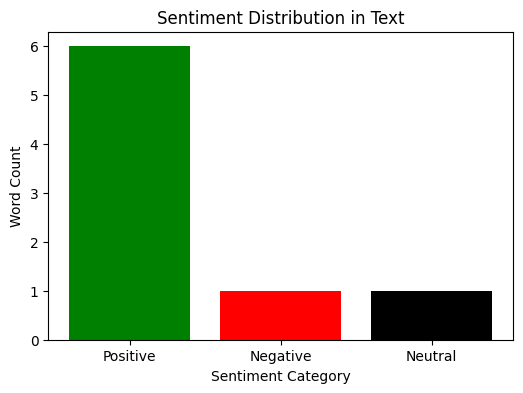

In [85]:
import matplotlib.pyplot as plt

# Counting positive, negative, and neutral words
positive_count = sum(1 for word, score in lexicon.items() if word in word_scores and score > 0)
negative_count = sum(1 for word, score in lexicon.items() if word in word_scores and score < 0)
neutral_count = sum(1 for word, score in lexicon.items() if word in word_scores and score == 0)

# Creating a bar chart
categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['green', 'red', 'black'])
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.title('Sentiment Distribution in Text')
plt.show()


pueblo:0
perderse:-1
bosque:0
hada:0
paz:1
nerviosa:-1
criaturas:0
niña:1
amor:1
mágico:1
deseo:1
Sentiment Score: 3


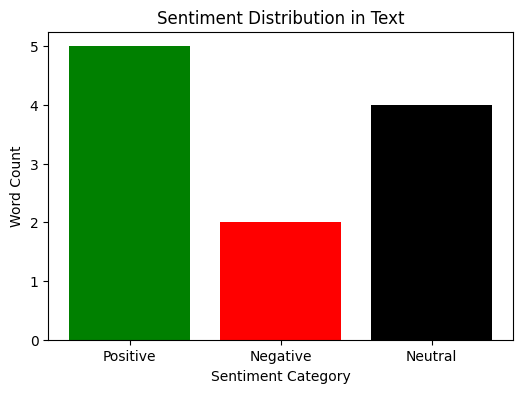

In [86]:
#example text
with open('Sofia.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()

#calcuating sentiment score
sentiment_score, word_scores = calculate_sentiment(text2)
print(f"Sentiment Score: {sentiment_score}")

 # Counting positive, negative, and neutral words
positive_count = sum(1 for word, score in lexicon.items() if word in word_scores and score > 0)
negative_count = sum(1 for word, score in lexicon.items() if word in word_scores and score < 0)
neutral_count = sum(1 for word, score in lexicon.items() if word in word_scores and score == 0)

# Creating a bar chart
categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['green', 'red', 'black'])
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.title('Sentiment Distribution in Text')
plt.show()

## Vader Sentiment and Deep Translator

- Vader Sentiment https://github.com/cjhutto/vaderSentiment
- Deep Translator https://github.com/nidhaloff/deep-translator 

This code performs sentiment analysis on a Spanish Language text file by following a steps to clean, split, translate, and analyze the text. 

It starts by using SentimentIntensityAnalyzer from VADER to run sentiment analysis on the translated text.

1.	remove_timestamps(): This function removes any timestamps in the format [hh:mm:ss.xxx] from the input text using a regular expression pattern. It ensures that the text is clean and does not contain unnecessary time data before performing any analysis.
2.	split_text(): This function breaks the cleaned text into smaller chunks, each of a maximum length of 5000 characters, without splitting sentences inappropriately. The function splits the text at sentence boundaries and organizes it into chunks, ensuring that each chunk fits within the specified character limit.
3.	Translation: The GoogleTranslator from the Deep Translator library is used to translate the Spanish text chunks into English. Each chunk is translated separately, and the translated text is concatenated back together to form a complete translated version.
4.	Sentiment Analysis: After translation, the VADER SentimentIntensityAnalyzer is applied to the translated text to assess its overall sentiment. The function polarity_scores() returns a dictionary with sentiment scores, including the positive, negative, neutral, and compound scores, giving a comprehensive view of the text’s emotional tone.

The final output is a sentiment analysis score for the translated text, which helps determine whether the overall sentiment of the content is positive, negative, or neutral. This process enables sentiment analysis of multilingual content, in this case, Spanish to English.

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator


In [88]:
analyzer = SentimentIntensityAnalyzer()

def remove_timestamps(text):
    # Regular expression pattern to match timestamps [hh:mm:ss.xxx]
    pattern = r"\[\d{2}:\d{2}:\d{2}\.\d{3}\]\s*-\s*"
    # Remove timestamps from the text
    cleaned_text = re.sub(pattern, "", text)
    return cleaned_text

clean_text = remove_timestamps(text) # running fuction remove_timestamp
#print(clean_text) # Print the cleaned text without timestamps

def split_text(text, max_length=5000): 
    #Splits text into chunks of max_length characters without breaking sentences.
    sentences = re.split(r'(?<=[.!?]) +', text)  # Split at sentence boundaries
    chunks = []
    current_chunk = ""

    for sentence in sentences:
        if len(current_chunk) + len(sentence) <= max_length:
            current_chunk += sentence + " "
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + " "

    if current_chunk:
        chunks.append(current_chunk.strip())

    return chunks

text_chunks = split_text(clean_text) # running function split_text
#full_text = " ".join(text_chunks)

translator = GoogleTranslator(source='es', target='en') 

translated_chunks = [translator.translate(chunk) for chunk in text_chunks]
translated_text = " ".join(translated_chunks)  # Translate Spanish to English

with open('SylviaGonzalez_CasaLatina.txt', 'r', encoding='utf-8') as f:
    text = f.read()

scores = analyzer.polarity_scores(translated_text)
print(scores)

{'neg': 0.05, 'neu': 0.833, 'pos': 0.117, 'compound': 0.9998}


## NLTK

- NLTK https://www.nltk.org/


This section of code performs sentiment analysis on three distinct text files: Story 1, The Final Algorithm; Story 2, The Forgotten Letter; and Story 3, The Lucky Coin. It utilizes the VADER (Valence Aware Dictionary and Sentiment Reasoner) tool, which is part of the NLTK (Natural Language Toolkit) library. The necessary NLTK resources, such as tokenizers and the VADER lexicon, are downloaded to facilitate sentiment analysis. The SentimentIntensityAnalyzer is initialized to assess the sentiment of the text. Each text file's content is read into memory, and the polarity_scores() method is applied to evaluate the sentiment, producing a dictionary with positive, negative, neutral, and compound sentiment scores. The sentiment scores for each story are printed, providing insights into the emotional tone of the texts. This process is repeated for all three stories, offering a comprehensive sentiment assessment for each text.

In [89]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

The nltk.download('punkt'), nltk.download('punkt_tab'), and nltk.download('vader_lexicon') commands are used to download essential resources from the Natural Language Toolkit (NLTK) library for text processing and sentiment analysis. The first command, nltk.download('punkt'), downloads the Punkt tokenizer, a pre-trained model designed to split text into sentences and words, which is crucial for text preprocessing tasks like sentence segmentation and tokenization. The second command, nltk.download('punkt_tab'), appears to be an error or incorrect reference, as there is no valid resource by that name in NLTK. The third command, nltk.download('vader_lexicon'), downloads the VADER sentiment lexicon, which is specifically designed for sentiment analysis. This lexicon contains a list of words with associated sentiment scores, helping to determine the overall sentiment of a text (positive, negative, or neutral). Together, these downloads enable the use of NLTK's text tokenization and sentiment analysis tools, facilitating more efficient and accurate text processing for natural language tasks.

In [90]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianitalopez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dianitalopez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dianitalopez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The line sia = SentimentIntensityAnalyzer() creates an instance of the SentimentIntensityAnalyzer class from the VADER (Valence Aware Dictionary and sEntiment Reasoner) module in NLTK. This class is specifically designed for sentiment analysis, providing a method to assess the sentiment of a given text. By creating this instance, you can use the polarity_scores() method to analyze text and obtain a set of sentiment scores, including positive, negative, neutral, and compound scores, helping to determine the overall emotional tone of the text.

In [91]:
sia = SentimentIntensityAnalyzer()

This modified code processes three separate text files: story1_the_final_algorithm.txt, story2_the_lucky_coin.txt, and story3_the_secret_quest.txt. For each story, the content is read into a variable, and the SentimentIntensityAnalyzer (sia) is used to calculate the sentiment scores for each text. The polarity_scores() method returns a dictionary with the sentiment analysis results, including positive, negative, neutral, and compound scores. Finally, the sentiment scores for each story are printed, allowing you to compare the overall emotional tone of each one.

In [92]:
with open('story1_the_final_algorithm.txt') as f:
    text_s1 = f.read()
scores = sia.polarity_scores(text_s1)
print(f"Sentiment Scores: {scores}")

Sentiment Scores: {'neg': 0.034, 'neu': 0.762, 'pos': 0.205, 'compound': 0.9902}


In [93]:
with open('story2_the_forgotten_letter.txt') as f:
    text_s2 = f.read()
scores = sia.polarity_scores(text_s2)
print(f"Sentiment Scores: {scores}")

Sentiment Scores: {'neg': 0.257, 'neu': 0.632, 'pos': 0.111, 'compound': -0.9865}


In [94]:
with open('story3_the_lucky_coin.txt') as f:
    text_s3 = f.read()
scores = sia.polarity_scores(text_s3)
print(f"Sentiment Scores: {scores}")

Sentiment Scores: {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.9886}


### Plotting Sentiment 

- Matplotlib https://matplotlib.org/ 

This code snippet performs detailed sentiment analysis on a given text, specifically Story 3, 'The Lucky Coin', and visualizes the sentiment trends for each sentence.

First, it uses the SentimentIntensityAnalyzer (sia) from the VADER module to evaluate sentiment. The text is cleaned by removing quotation marks and certain punctuation using regular expressions (re.sub). Next, the nltk.sent_tokenize() function splits the cleaned text into individual sentences. Each sentence is then analyzed for sentiment using the polarity_scores() method, which returns a dictionary containing four sentiment scores: positive, negative, neutral, and compound.

The code proceeds by extracting each of these sentiment scores and organizing them into separate lists for positive, negative, neutral, and compound sentiment scores. It then prints the total number of sentences along with each sentence and its corresponding sentiment score for detailed inspection.

Finally, the code generates a visual sentiment timeline using Matplotlib to plot the sentiment scores for each sentence. It creates a graph with four different sentiment curves: positive, negative, neutral, and compound. The graph provides a clear visual representation of how sentiment varies across the text, allowing for a more intuitive understanding of the emotional flow throughout the story. The plot includes labels, a title, a legend, and a grid to enhance readability and comprehension of the sentiment distribution.


Total sentences: 15
1. Oliver had always been fortunate. (Sentiment Score: {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404})
2. His charming smile, his optimistic nature—everything about him radiated luck. (Sentiment Score: {'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'compound': 0.891})
3. So when he found the old coin on the sidewalk, it didn’t surprise him. (Sentiment Score: {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732})
4. Fantastic, he muttered, rubbing it between his fingers. (Sentiment Score: {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.5574})
5. That night, everything went perfectly. (Sentiment Score: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369})
6. He won a prize at work, his date with Sophia was amazing, and his favorite restaurant gave him a free dessert just because. (Sentiment Score: {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.9524})
7. Lucky coin, he joked, flipping it in his hand. (Sentiment Score: {'neg': 0.0, 'neu

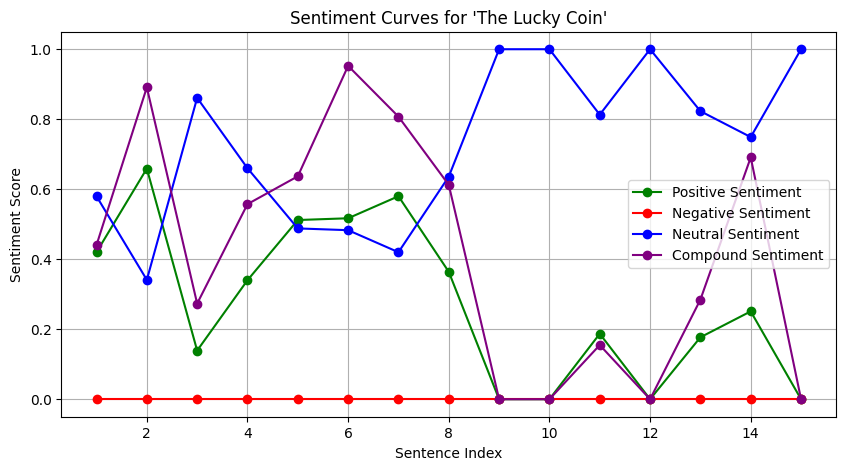

In [95]:
sia = SentimentIntensityAnalyzer()

clean_text = re.sub(r'["“”]', '', text_s3)

sentences = nltk.sent_tokenize(clean_text) #split story into sentence

# analyze sentiment for each sentence. the function polarity_scores() that takes a string of text and returns a dictionary of sentiment scores 
sentiment_scores = [sia.polarity_scores(sentence) for sentence in sentences]

print(f"Total sentences: {len(sentences)}")

# Extract individual sentiment scores: positive, negative, neutral, and compound
positive_scores = [score['pos'] for score in sentiment_scores]
negative_scores = [score['neg'] for score in sentiment_scores]
neutral_scores = [score['neu'] for score in sentiment_scores]
compound_scores = [score['compound'] for score in sentiment_scores]

# sentence and its score
for i, (sentence, score) in enumerate(zip(sentences, sentiment_scores), 1):
    print(f"{i}. {sentence} (Sentiment Score: {score})")

# Plot sentiment timeline
plt.figure(figsize=(10, 5))
# Plot positive, negative, and neutral sentiment scores
plt.plot(range(1, len(sentences) + 1), positive_scores, marker='o', linestyle='-', color='green', label="Positive Sentiment")
plt.plot(range(1, len(sentences) + 1), negative_scores, marker='o', linestyle='-', color='red', label="Negative Sentiment")
plt.plot(range(1, len(sentences) + 1), neutral_scores, marker='o', linestyle='-', color='blue', label="Neutral Sentiment")
plt.plot(range(1, len(sentences) + 1), compound_scores, marker='o', linestyle='-', color='purple', label="Compound Sentiment")


# Labels and title
plt.xlabel("Sentence Index")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Curves for 'The Lucky Coin'")
plt.legend()

plt.grid(True)
plt.show()

Total sentences: 18
Total sentiment scores: 18
Last sentence detected: But as she placed the letter back in the drawer, a small part of her felt lighter.
1. The letter had remained ignored at the bottom of Maria’s drawer for years. (Sentiment Score: -0.3182)
2. She had refused to open it, refused to acknowledge its existence. (Sentiment Score: -0.5267)
3. It was from David. (Sentiment Score: 0.0)
4. The name alone made her angry. (Sentiment Score: -0.6486)
5. They had been inseparable once. (Sentiment Score: 0.0)
6. His words had been adorable, his promises heartwarming. (Sentiment Score: 0.836)
7. But in the end, it had all turned deceitful, betrayal hidden beneath beautiful lies. (Sentiment Score: -0.8126)
8. She picked up the envelope, fingers trembling. (Sentiment Score: -0.3612)
9. The old wounds were painful, but something inside her needed closure. (Sentiment Score: -0.2382)
10. As she read, her heart sank. (Sentiment Score: 0.0)
11. I know I was wrong. (Sentiment Score: -0.4767

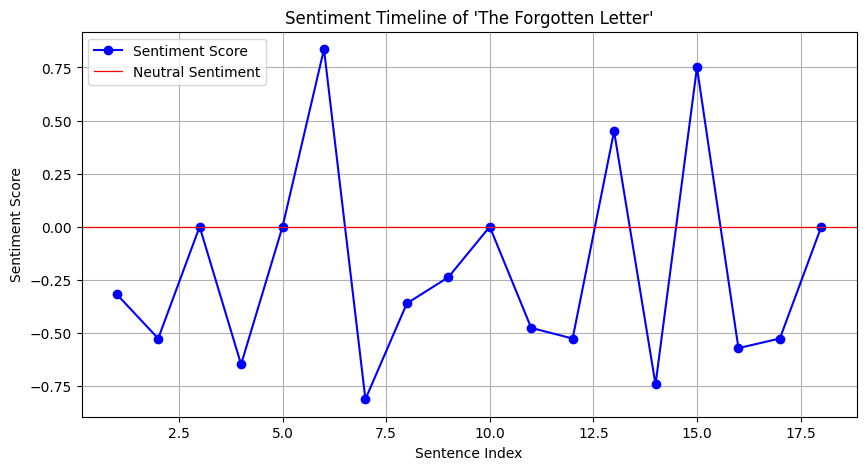

In [96]:
clean_text = re.sub(r'["“”]', '', text_s2)

sentences = nltk.sent_tokenize(clean_text) #split story into sentence

# analyze sentiment for each sentence. the function polarity_scores() that takes a string of text and returns a dictionary of sentiment scores 
sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

print(f"Total sentences: {len(sentences)}")
print(f"Total sentiment scores: {len(sentiment_scores)}")
print(f"Last sentence detected: {sentences[-1]}")

# sentence and its score
for i, (sentence, score) in enumerate(zip(sentences, sentiment_scores), 1):
    print(f"{i}. {sentence} (Sentiment Score: {score})")

# Plot sentiment timeline
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(sentences) + 1), sentiment_scores, marker='o', linestyle='-', color='b', label="Sentiment Score")

# Labels and title
plt.axhline(y=0, color='red', linestyle='-', linewidth=0.9, label= "Neutral Sentiment")  # Neutral line
plt.xlabel("Sentence Index")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Timeline of 'The Forgotten Letter'")
plt.legend()
plt.grid(True)
plt.show()